### INTRODUCTION

I love pets, who doesn't. Maybe everyone doesn't like dog but they might love
another animal. Research has shown that having pet decreses the anexity, 
depression and bring happiness and joyness to the people. 

In this project, I will analyze the data from one of the largest internet-based
pet company called [PetFinder](https://www.petfinder.com/). From the [Wikipedia]
(https://en.wikipedia.org/wiki/Petfinder),*"The company reports that it 
currently lists more than 315,000 adoptable pets from nearly 14,000 animal 
shelters and rescue groups. A commercial enterprise founded in 1996, it is now 
owned by Nestlé Purina PetCare Company and reports that it has facilitated more 
than 22 million pet adoptions as of 2013. Most of the pets listed on Petfinder 
are dogs and cats, but they list all types of animals available from shelters 
and rescue groups, from small fish, reptiles and birds to horses and livestock."*

### DATA ACQUISITION

Here, we will import the petfinder website or database data using the api. The api documentation can be found via this [link](https://www.petfinder.com/developers/v2/docs/). Fortunately, to ease the work with the api, someone have already built the python wrapper for the api whose details can be found at this [link](https://github.com/aschleg/petpy). Therefore, we will be using the wrapper to extract the information. We will be using the a python wrapper for the [Petfinder](https://www.petfinder.com/) website. I have also found a interesting blog that describes how to work with the wrapper and it's explanation which can be find at this [link](https://medium.com/analytics-vidhya/navigating-petfinders-api-using-petpy-wrapper-2cf085c33d75)

In [4]:
#Libraries
import pandas as pd
import numpy as np
import petpy

#API key (This can be accesed after logging into developers page of petfinder)
api_key = "DnAygX5BLJaB4pvU9iPHWZ5o9TpoqnCxmxtsLXqCurKIaxCzde"
secret_key = "N5yYbGKbDC9ivcrYs8UaVKYLT0L0twgW5Kbsb9EP"

#Initialize the wrapper
pf = petpy.Petfinder(key=api_key, secret=secret_key)


### About the Database and Query Parameter

There are a lot of query parameter in the API. I wouldn't be able to explain all of those here. For the detailed information please visit [this](https://www.petfinder.com/developers/v2/docs/) link. However, I will explain some basic parameter that I will be using. These parameter are also for the wrapper.

1. 'animal_type': Different types of animals are in the database, however, for this project we will be working on the 'dogs' only. 
2. 'status': The status referred to the animals that are adaptable or not. As per API this has three values ('adoptable','adopted','found'). We will only look at the 'adopted' data. The reason for this will be described in latter process. 
3. 'pages': Number of pages to search for
4. 'results_per_page': Results per page's max value is 100, so we will use max val

In [7]:
#Data-Frame for the extracted data

# df_adopted = pf.animals(animal_type= 'dog',
#                         status = ['adopted'],
#                         return_df = True,
#                         pages = 600,
#                         results_per_page = 100)

In [9]:
#Saving the extracted df to a CSV file as we won't running this process 
#everytime we run notebook

# df_adopted.to_csv("df_first_extract.csv")

In [87]:
#Read the same file and pulling it to the enviroment 

df_raw = pd.read_csv('df_first_extract.csv')

### DESCRIPTIVE ANALYTICS

In [88]:
print(f'There are {df_raw.shape[0]} rows and {df_raw.shape[1]} columns in the df',"\n")

#Name of the Columns
print(f'The columns name are {[i for i in df_raw.columns]}', '\n')

#Head of the dataframe
df_raw.head()


There are 60000 rows and 51 columns in the df 

The columns name are ['Unnamed: 0', 'id', 'organization_id', 'url', 'type', 'species', 'age', 'gender', 'size', 'coat', 'tags', 'name', 'description', 'organization_animal_id', 'photos', 'videos', 'status', 'status_changed_at', 'published_at', 'distance', 'breeds.primary', 'breeds.secondary', 'breeds.mixed', 'breeds.unknown', 'colors.primary', 'colors.secondary', 'colors.tertiary', 'attributes.spayed_neutered', 'attributes.house_trained', 'attributes.declawed', 'attributes.special_needs', 'attributes.shots_current', 'environment.children', 'environment.dogs', 'environment.cats', 'primary_photo_cropped.small', 'primary_photo_cropped.medium', 'primary_photo_cropped.large', 'primary_photo_cropped.full', 'contact.email', 'contact.phone', 'contact.address.address1', 'contact.address.address2', 'contact.address.city', 'contact.address.state', 'contact.address.postcode', 'contact.address.country', 'animal_id', 'animal_type', 'organization_id.1',

,Unnamed: 0,id,organization_id,url,type,species,age,gender,size,coat,...,contact.address.address1,contact.address.address2,contact.address.city,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,organization_id.1,primary_photo_cropped
0,0,54746507,OH1215,https://www.petfinder.com/dog/buzz-54746507/oh...,Dog,Dog,Baby,Male,Small,Medium,...,NaN,NaN,Cincinnati,OH,45252,US,54746507,dog,oh1215,NaN
1,1,54746483,NH74,https://www.petfinder.com/dog/kane-54746483/nh...,Dog,Dog,Young,Male,Large,NaN,...,PO Box 107,NaN,Hillsboro,NH,03244,US,54746483,dog,nh74,NaN
2,2,54746362,WA650,https://www.petfinder.com/dog/klondike-5474636...,Dog,Dog,Baby,Male,Large,NaN,...,NaN,NaN,Seattle,WA,98165,US,54746362,dog,wa650,NaN
3,3,54746363,WA650,https://www.petfinder.com/dog/star-little-girl...,Dog,Dog,Adult,Female,Large,NaN,...,NaN,NaN,Seattle,WA,98165,US,54746363,dog,wa650,NaN
4,4,54746359,KY155,https://www.petfinder.com/dog/rocky-54746359/k...,Dog,Dog,Young,Male,Small,NaN,...,14 Fido Court,NaN,Frankfort,KY,40601,US,54746359,dog,ky155,NaN


#### Removal of the Unnecessary Columns

There are various column whose data we won't be needing and we will remove those kinds of columns. They are:

['Unnamed: 0','id', 'organization_id', 'url', 'type', 'species', 'organization_animal_id',
'photos', 'videos', 'distance', 'primary_photo_cropped.small', 'primary_photo_cropped.medium',
'primary_photo_cropped.large', 'primary_photo_cropped.full', 'contact.email',
'contact.phone', 'contact.address.address1', 'contact.address.address2', 'contact.address.city',
'contact.address.postcode', 'contact.address.country', 'animal_id', 'animal_type', 'organization_id',
'organization_id.1', 'primary_photo_cropped']

In [89]:
no_need_columns = ['Unnamed: 0','id', 'organization_id', 'url', 'type', 
                    'species', 'organization_animal_id', 'photos', 'videos', 
                    'distance', 'primary_photo_cropped.small', 
                    'primary_photo_cropped.medium','primary_photo_cropped.large',
                     'primary_photo_cropped.full', 'contact.email','contact.phone',
                      'contact.address.address1', 'contact.address.address2', 
                      'contact.address.city','contact.address.postcode', 
                      'contact.address.country', 'animal_id', 'animal_type', 
                      'organization_id','organization_id.1', 'primary_photo_cropped']

#Making new data-frame by dropping those un-necessary columns
df_raw.drop(no_need_columns, axis=1, inplace=True)

#### Missing Value

age                               0
gender                            0
size                              0
coat                          26944
tags                              0
name                              0
description                    4313
status                            0
status_changed_at                 0
published_at                      0
breeds.primary                    0
breeds.secondary              38658
breeds.mixed                      0
breeds.unknown                    0
colors.primary                22243
colors.secondary              40589
colors.tertiary               56863
attributes.spayed_neutered        0
attributes.house_trained          0
attributes.declawed           60000
attributes.special_needs          0
attributes.shots_current          0
environment.children          26632
environment.dogs              17238
environment.cats              39507
contact.address.state             0
dtype: int64


<AxesSubplot:>

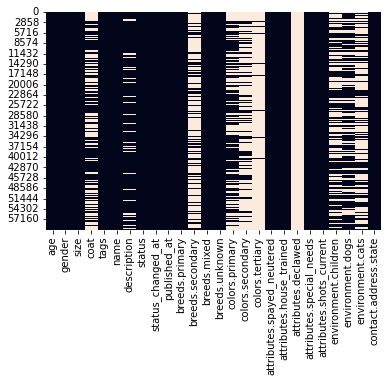

In [90]:
#Null/Missing Values
print(df_raw.isnull().sum())

#Missing Value Visualization
import seaborn as sns
sns.heatmap(df_raw.isnull(), cbar=False)

In [91]:
#FIRST ROUND REMOVAL OF MISSING VALUE
#We will remove those whole columns which have almost everything missing ot those columns who we think might not be useful. 

first_round_col = ['attributes.declawed','colors.secondary', 'colors.tertiary','breeds.secondary']

df_raw.drop(first_round_col, axis=1, inplace=True)

In [92]:
#The another approach is to try to find the instances where there are no missing values. 

#Finding how many columns have at least 1 missing value for each row
print(df_raw[df_raw.isnull().any(axis=1)].shape)

#Since, there are almost 50,000 data points out of 60,000 where there are at 
# least one missing value we can't use just the overlapped data. 


(50022, 22)


In [93]:
print(df_raw.isnull().sum())

age                               0
gender                            0
size                              0
coat                          26944
tags                              0
name                              0
description                    4313
status                            0
status_changed_at                 0
published_at                      0
breeds.primary                    0
breeds.mixed                      0
breeds.unknown                    0
colors.primary                22243
attributes.spayed_neutered        0
attributes.house_trained          0
attributes.special_needs          0
attributes.shots_current          0
environment.children          26632
environment.dogs              17238
environment.cats              39507
contact.address.state             0
dtype: int64


In [74]:
set(df_raw['colors.primary'])

{'Apricot / Beige',
 'Bicolor',
 'Black',
 'Brindle',
 'Brown / Chocolate',
 'Golden',
 'Gray / Blue / Silver',
 'Harlequin',
 'Merle (Blue)',
 'Merle (Red)',
 'Red / Chestnut / Orange',
 'Sable',
 'Tricolor (Brown, Black, & White)',
 'White / Cream',
 'Yellow / Tan / Blond / Fawn',
 nan}

In [75]:
null_columns = df_raw.columns[df_raw.isnull().any()]
null_columns

Index(['coat', 'description', 'breeds.secondary', 'colors.primary',
       'environment.children', 'environment.dogs', 'environment.cats'],
      dtype='object')

In [76]:
df_raw[df_raw.isnull().any(axis=1)][null_columns]


,coat,description,breeds.secondary,colors.primary,environment.children,environment.dogs,environment.cats
0,Medium,Buzz is adopted. Brother to Kevin\n\nAll of th...,Chihuahua,"Tricolor (Brown, Black, & White)",True,True,NaN
1,NaN,You can fill out an adoption application onlin...,NaN,NaN,NaN,NaN,NaN
2,NaN,Animal Profile: Klondike is an estimated 14-we...,NaN,NaN,True,True,True
3,NaN,Animal Profile: Little Girl is an estimated 2-...,NaN,NaN,NaN,True,NaN
4,NaN,"He has had all his shots, heartworm, and flea ...",Mixed Breed,Bicolor,NaN,NaN,NaN
...,...,...,...,...,...,...,...
59995,Short,Holiday greetings from Bree. She and her three...,Hound,"Tricolor (Brown, Black, & White)",NaN,True,NaN
59996,NaN,Chipper was born Oct 22 he is fluffy and cuddl...,Australian Shepherd,NaN,True,True,True
59997,NaN,Woof! I’m Bashful. My owner couldn’t care for ...,Shih Tzu,NaN,True,True,True
59998,Medium,Cinder is a guessed to be 4 year old. Amish mi...,NaN,"Tricolor (Brown, Black, & White)",NaN,NaN,NaN
